In [43]:
import seaborn as sns
import matplotlib as mpl
import random as rd
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("D:\\books sem5\\books sem 7\\Practical Docs\\LP3\\ML\\uber.csv")

In [62]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [63]:
df = df.drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis = 1)
df.dropna(inplace=True)

<Axes: ylabel='fare_amount'>

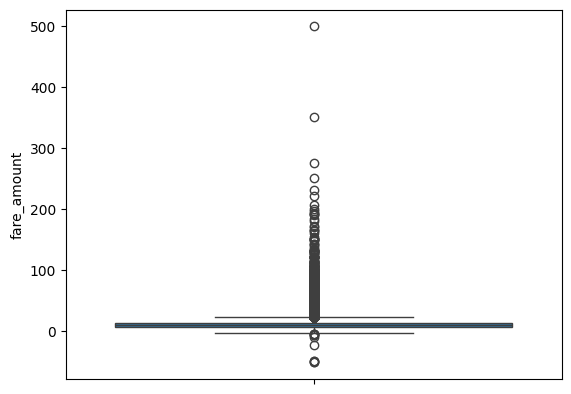

In [64]:
sns.boxplot(df['fare_amount'])

In [65]:
low = df['fare_amount'].quantile(0.05)
high = df['fare_amount'].quantile(0.95)
df = df[(df['fare_amount'] > low) & (df['fare_amount'] < high)]

<Axes: ylabel='fare_amount'>

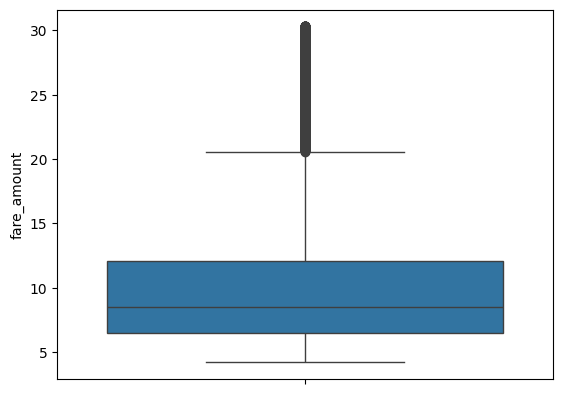

In [66]:
sns.boxplot(df['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x187b6d67ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x187b6d65a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x187b6d65900>],
 'medians': [<matplotlib.lines.Line2D at 0x187b6d657b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x187b6d677c0>],
 'means': []}

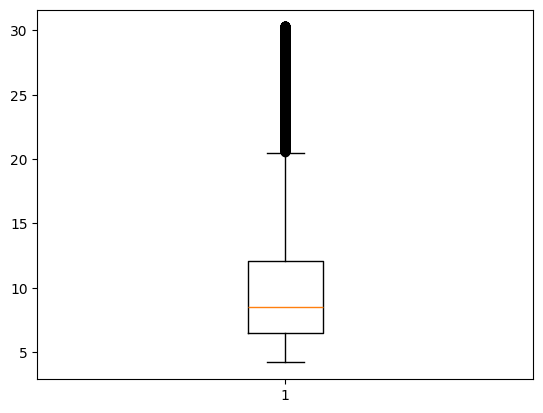

In [67]:
plt.boxplot(df['fare_amount'])

<Axes: >

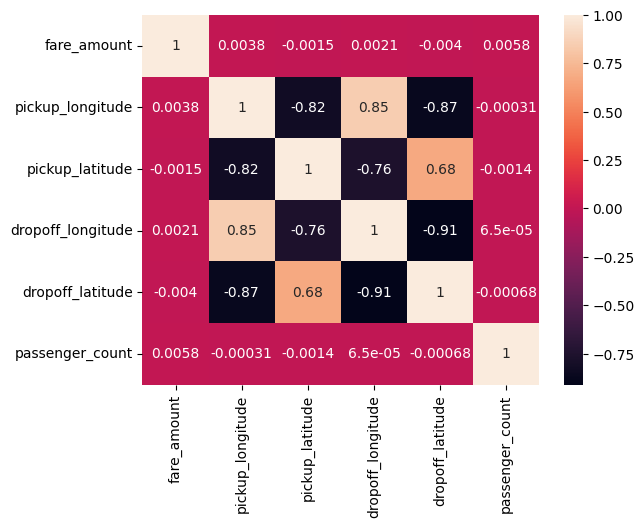

In [68]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [69]:
from sklearn.model_selection import train_test_split
X = df.drop(['fare_amount'], axis=1)
y = df['fare_amount']
X_train, x_test, y_train, y_test = train_test_split(X, y)

In [70]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(x_test)

In [71]:
from sklearn.metrics import mean_squared_error, r2_score
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE -> ", RMSE)
R2 = r2_score(y_test, y_pred)
print("R2 -> ", R2)

RMSE ->  5.134568207914079
R2 ->  8.02786891548335e-05


In [76]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred_rf = model.predict(x_test)

In [77]:
from sklearn.metrics import mean_squared_error, r2_score
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE -> ", RMSE)
R2 = r2_score(y_test, y_pred_rf)
print("R2 -> ", R2)

RMSE ->  2.6220189841042933
R2 ->  0.7394887388422424


C:\Users\lenovo\AppData\Local\Temp\ipykernel_15548\2002809476.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, color='red', label='Perfect Prediction Line')


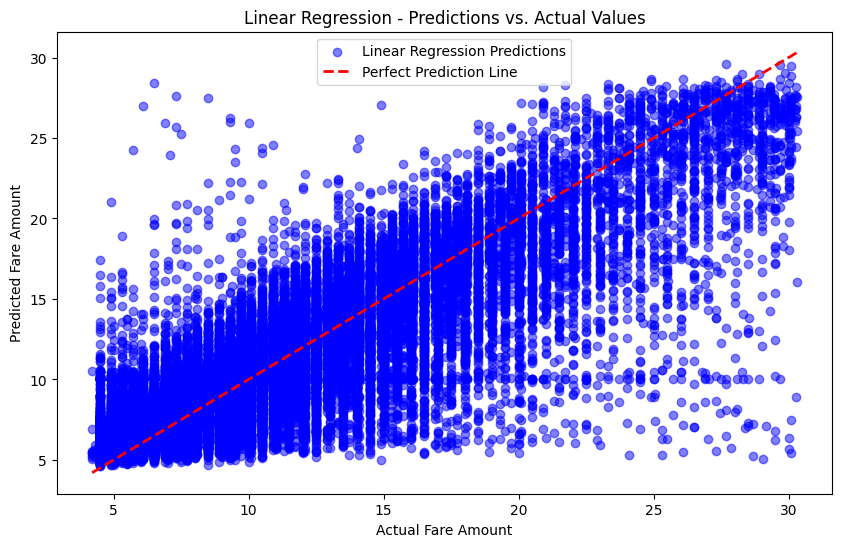

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Linear Regression Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, color='red', label='Perfect Prediction Line')
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount")
plt.title("Linear Regression - Predictions vs. Actual Values")
plt.legend()
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15548\2293787849.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, color='red', label='Perfect Prediction Line')


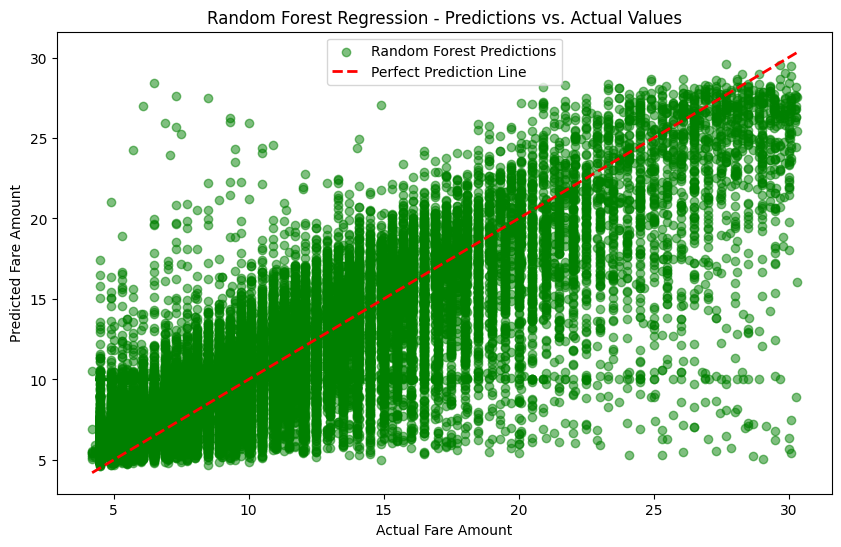

In [75]:
y_pred_rf = model.predict(x_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green', label='Random Forest Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, color='red', label='Perfect Prediction Line')
plt.xlabel("Actual Fare Amount")
plt.ylabel("Predicted Fare Amount")
plt.title("Random Forest Regression - Predictions vs. Actual Values")
plt.legend()
plt.show()

In [79]:
# Select a sample index from the test set
sample_index = 4  # You can change this index to view other samples

# Get the actual value
actual_value = y_test.iloc[sample_index]

# Get the predicted values from both models
predicted_value_lr = y_pred[sample_index]          # Linear Regression prediction
predicted_value_rf = y_pred_rf[sample_index]       # Random Forest prediction

# Print out the values
print(f"Sample {sample_index + 1}")
print(f"Actual Fare Amount: {actual_value}")
print(f"Linear Regression Predicted Fare Amount: {predicted_value_lr}")
print(f"Random Forest Predicted Fare Amount: {predicted_value_rf}")


Sample 5
Actual Fare Amount: 16.5
Linear Regression Predicted Fare Amount: 18.645999999999994
Random Forest Predicted Fare Amount: 19.261999999999993
